<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

In [4]:
from pprint import pprint  # Used for pretty print

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [5]:
# check the iowa file location for your computer 
iowa_file = '../../datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(iowa.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [6]:
# Follow: EDA from Pandas_Review_sat-drugs.ipynb

In [7]:
# Print columns/variables and datatypes

#  Data Types from iowa dataset:
print "Data Types from iowa dataset:"
print
print iowa.dtypes

Data Types from iowa dataset:

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object


In [8]:
print "Look at the first 3 rows of the DataFrame and describe what the data appears to be."
iowa.head(3)

# Store Alcohol sales

Look at the first 3 rows of the DataFrame and describe what the data appears to be.


,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [9]:
# Info from iowa dataset:
print "Info from iowa dataset:"
print
print iowa.info()
print
print "Shape of iowa dataset: "
print iowa.shape

Info from iowa dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
d

In [12]:
# Describe iowa dataset
print "Describe iowa dataset:"
iowa.describe()

Describe iowa dataset:


,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


In [13]:
#  Columns
print "Columns from iowa dataset"
print
pprint(iowa.columns)

# Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
#       u'County', u'Category', u'Category Name', u'Vendor Number',
#       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
#       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
#       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
#       dtype='object')

Columns from iowa dataset

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')


In [14]:
# Create a "data dictionary" based on the data (ref: EDA (Pandas_Review_sat-drugs.ipynb)

'''
Info from iowa dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(5), object(9)
memory usage: 37.2+ MB
None

Shape of iowa dataset: 
(270955, 18)

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
       dtype='object')

'''

data_dict = {
    'Date':{
        'type':iowa['Date'].dtype,
        'description':'Date'
    },
    'Store Number':{
        'type':iowa['Store Number'].dtype,
        'description':'Store Number'
    },
    'City':{
        'type':iowa['City'].dtype,
        'description':'City'
    },
    'Zip Code':{
        'type':iowa['Zip Code'].dtype,
        'description':'Zip Code'
    },
    'County Number':{
        'type':iowa['County Number'].dtype,
        'description':'County Number'
    },
    'County':{
        'type':iowa['County'].dtype,
        'description':'County'
    },
    'Category':{
        'type':iowa['Category'].dtype,
        'description':'Category'
    },
    'Category Name':{
        'type':iowa['Category Name'].dtype,
        'description':'Category Name'
    },
    'Vendor Number':{
        'type':iowa['Vendor Number'].dtype,
        'description':'Vendor Number'
    },
    'Item Number':{
        'type':iowa['Item Number'].dtype,
        'description':'Item Number'
    },
    'Item Description':{
        'type':iowa['Item Description'].dtype,
        'description':'Store Number'
    },
    'Bottle Volume (ml)':{
        'type':iowa['Bottle Volume (ml)'].dtype,
        'description':'Bottle Volume (ml)'
    },
    'State Bottle Cost':{
        'type':iowa['State Bottle Cost'].dtype,
        'description':'State Bottle Cost'
    },
    'State Bottle Retail':{
        'type':iowa['State Bottle Retail'].dtype,
        'description':'State Bottle Retail'
    },
    'Bottles Sold':{
        'type':iowa['Bottles Sold'].dtype,
        'description':'Bottles Sold'
    },
    'Sale (Dollars)':{
        'type':iowa['Sale (Dollars)'].dtype,
        'description':'Sale (Dollars)'
    },
    'Volume Sold (Liters)':{
        'type':iowa['Volume Sold (Liters)'].dtype,
        'description':'Volume Sold (Liters)'
    },
    'Volume Sold (Gallons)':{
        'type':iowa['Volume Sold (Gallons)'].dtype,
        'description':'Volume Sold (Gallons)'
    },
    'dataset_shape':iowa.shape
}


pprint("iowa data dictionary:")
print
pprint(data_dict)

'iowa data dictionary:'

{'Bottle Volume (ml)': {'description': 'Bottle Volume (ml)',
                        'type': dtype('int64')},
 'Bottles Sold': {'description': 'Bottles Sold', 'type': dtype('int64')},
 'Category': {'description': 'Category', 'type': dtype('float64')},
 'Category Name': {'description': 'Category Name', 'type': dtype('O')},
 'City': {'description': 'City', 'type': dtype('O')},
 'County': {'description': 'County', 'type': dtype('O')},
 'County Number': {'description': 'County Number', 'type': dtype('float64')},
 'Date': {'description': 'Date', 'type': dtype('O')},
 'Item Description': {'description': 'Store Number', 'type': dtype('O')},
 'Item Number': {'description': 'Item Number', 'type': dtype('int64')},
 'Sale (Dollars)': {'description': 'Sale (Dollars)', 'type': dtype('O')},
 'State Bottle Cost': {'description': 'State Bottle Cost', 'type': dtype('O')},
 'State Bottle Retail': {'description': 'State Bottle Retail',
                         'type': dtype('O')}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [15]:
# Identify columns that you will need to convert and clean. Where and how is the data corrupted
# 
# Rename columns (replace '' with '_' ) :  (ex. df.columns = df.columns.str.replace(' ', '_')
#
# Replace '$' with '' in ['State Bottle Cost','State Bottle Retail','Sale (Dollars)'] 
# 
# Convert columns to a numeric type : pd.to_numeric(s, errors='coerce')
# => ['State Bottle Cost','State Bottle Retail','Sale (Dollars)']
#
# Convert ['Date'] column to datetime # pd.to_datetime(['2005/11/23', '2010.12.31'])

### 3.2 Clean the columns

In [16]:
# Rename columns (replace '' with '_' ) :  (ex. df.columns = df.columns.str.replace(' ', '_')
# => ['State Bottle Cost','State Bottle Retail','Sale (Dollars)']
# X.columns = [x.lower().replace('.','_') for x in X.columns]
# iowa.columns = [x.lower().replace(' ','_') for x in iowa.columns]  # make columns lowercase and replace ' ' with '_'

iowa.columns = [x.replace(' ','_') for x in iowa.columns]  # make columns replace' ' with '_'


In [17]:
iowa.head(2)

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40


In [19]:
# Replace '$' with '' in ['State_Bottle_Cost','State_Bottle_Retail','Sale_(Dollars)']  # "see Central Limit Lab"

for col in ['State_Bottle_Cost','State_Bottle_Retail','Sale_(Dollars)']:
    iowa[col] = [x.replace('$','') for x in iowa[col]]

pprint(iowa.head(1))

         Date  Store_Number    City Zip_Code  County_Number  County  \
0  11/04/2015          3717  SUMNER    50674            9.0  Bremer   

    Category     Category_Name  Vendor_Number  Item_Number  \
0  1051100.0  APRICOT BRANDIES             55        54436   

            Item_Description  Bottle_Volume_(ml) State_Bottle_Cost  \
0  Mr. Boston Apricot Brandy                 750              4.50   

  State_Bottle_Retail  Bottles_Sold Sale_(Dollars)  Volume_Sold_(Liters)  \
0                6.75            12          81.00                   9.0   

   Volume_Sold_(Gallons)  
0                   2.38  


In [20]:
# Convert columns to a numeric type : pd.to_numeric(s, errors='coerce')
# => ['State_Bottle_Cost','State_Bottle_Retail','Sale_(Dollars)']
cols_convert = ['State_Bottle_Cost','State_Bottle_Retail','Sale_(Dollars)']
for col in cols_convert:
    iowa[col] = pd.to_numeric(iowa[col], errors='coerce')

pprint(iowa.info())
print
pprint(iowa.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store_Number             270955 non-null int64
City                     270955 non-null object
Zip_Code                 270955 non-null object
County_Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category_Name            270323 non-null object
Vendor_Number            270955 non-null int64
Item_Number              270955 non-null int64
Item_Description         270955 non-null object
Bottle_Volume_(ml)       270955 non-null int64
State_Bottle_Cost        270955 non-null float64
State_Bottle_Retail      270955 non-null float64
Bottles_Sold             270955 non-null int64
Sale_(Dollars)           270955 non-null float64
Volume_Sold_(Liters)     270955 non-null float64
Volume_Sold_(Gallons)    270955 non-null float64
dtypes: float64(7), int

In [21]:
pprint(iowa['County'].unique())

pprint(iowa['County'].value_counts())

array(['Bremer', 'Scott', 'Black Hawk', 'Story', 'Wright', 'Linn',
       'Wapello', 'Cerro Gordo', 'Polk', 'Benton', 'Mahaska', 'Lee',
       'Johnson', 'Jasper', 'Tama', 'Sioux', 'Dickinson', 'Pottawattamie',
       'Warren', 'Webster', 'Boone', 'Jackson', 'Carroll', 'Hamilton',
       'Woodbury', 'Washington', 'Floyd', 'Delaware', "O'Brien",
       'Buena Vista', 'Grundy', 'Dubuque', 'Adair', 'Crawford', 'Henry',
       'Guthrie', 'Winneshiek', 'Clay', 'Muscatine', 'Taylor', 'Harrison',
       'Hardin', 'Kossuth', 'Dallas', 'Decatur', 'Clinton', 'Butler',
       'Des Moines', 'Calhoun', 'Fayette', 'Jones', nan, 'Hancock', 'Iowa',
       'Howard', 'Appanoose', 'Jefferson', 'Emmet', 'Marshall', 'Page',
       'Cedar', 'Clayton', 'Sac', 'Monona', 'Allamakee', 'Winnebago',
       'Poweshiek', 'Marion', 'Buchanan', 'Franklin', 'Cherokee',
       'Humboldt', 'Greene', 'Keokuk', 'Plymouth', 'Shelby', 'Clarke',
       'Palo Alto', 'Cass', 'Lyon', 'Pocahontas', 'Ida', 'Union',
       'Fremon

In [22]:
pprint(iowa['Store_Number'].unique())
print
pprint(iowa['Store_Number'].unique().shape)
print
pprint(iowa['Store_Number'].value_counts())

array([3717, 2614, 2106, ..., 5237, 5201, 4778])

(1400,)

2633    2485
4829    2300
2512    1758
2572    1652
2190    1626
2515    1565
2501    1553
2500    1521
2670    1506
2587    1481
2648    1445
2620    1438
2603    1407
2590    1356
2629    1335
2666    1319
2614    1306
2565    1303
2647    1297
2616    1288
2619    1261
2561    1250
4129    1247
2623    1235
2552    1201
2625    1183
3773    1176
2506    1174
4167    1142
3952    1140
        ... 
5033       5
4121       5
5139       5
4990       5
5229       5
5189       5
5233       4
4335       4
5232       4
4954       4
4855       4
5208       4
4737       4
5234       3
5193       3
5195       3
5201       3
5216       3
4834       3
5223       3
4939       3
5192       2
5130       2
5218       2
4776       2
4567       2
4778       2
5053       1
9023       1
9018       1
Name: Store_Number, dtype: int64


In [23]:
pprint(iowa['Category'].unique())

array([ 1051100.,  1011100.,  1011200.,  1071100.,  1031080.,  1041100.,
        1051010.,  1012100.,  1032080.,  1081315.,  1011250.,  1081300.,
        1031200.,  1031100.,  1081700.,  1022100.,  1011300.,  1081600.,
        1081900.,  1081305.,  1051120.,  1082900.,  1042100.,  1081370.,
        1051110.,  1012210.,  1062200.,  1062310.,  1081200.,  1012200.,
        1032200.,  1012300.,  1062300.,  1052010.,  1081350.,  1081335.,
        1081400.,  1081010.,  1081390.,  1011500.,  1081330.,  1051150.,
        1081355.,  1101100.,  1062100.,  1062050.,  1081030.,  1081340.,
        1701100.,  1081317.,  1031090.,  1022200.,  1052100.,  1081015.,
        1081312.,  1081020.,  1081210.,  1081500.,  1051140.,  1041150.,
        1081380.,  1082100.,  1081250.,  1081230.,  1081365.,  1081240.,
        1032100.,  1031110.,  1041200.,  1081220.,  1012400.,  1011400.,
        1091100.,       nan,  1062500.,  1091300.,  1082200.,  1011600.,
        1501100.,  1062400.,  1011700.,  1092100., 

In [24]:
pprint(iowa['Category_Name'].unique())
print
pprint(iowa['Category_Name'].unique().shape)
print
pprint(iowa['Category_Name'].value_counts())

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

In [26]:
# Convert ['Date'] column to datetime # pd.to_datetime(['2005/11/23', '2010.12.31'])
iowa['Date'] =  pd.to_datetime(iowa['Date'])
pprint(iowa['Date'])

0        2015-11-04
1        2016-03-02
2        2016-02-11
3        2016-02-03
4        2015-08-18
5        2015-04-20
6        2015-08-05
7        2015-06-25
8        2016-01-04
9        2015-11-10
10       2015-09-28
11       2015-10-28
12       2015-01-22
13       2016-02-29
14       2016-01-04
15       2015-06-10
16       2016-02-25
17       2015-12-29
18       2015-12-26
19       2015-03-04
20       2015-01-16
21       2015-01-13
22       2015-03-24
23       2015-11-12
24       2016-03-14
25       2015-02-03
26       2015-11-23
27       2015-04-21
28       2015-12-01
29       2015-01-14
            ...    
270925   2015-01-05
270926   2015-12-26
270927   2015-08-31
270928   2015-10-07
270929   2016-01-25
270930   2015-10-13
270931   2015-05-26
270932   2015-06-18
270933   2015-02-26
270934   2015-03-18
270935   2015-06-08
270936   2015-03-31
270937   2015-01-27
270938   2015-04-29
270939   2015-05-04
270940   2015-01-21
270941   2015-02-09
270942   2015-06-15
270943   2015-10-21


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

In [27]:
# Look at null values per column
pprint("null values per column:")
print
pprint(iowa.isnull().sum())
print

# Drop all rows with No values
iowa = iowa.dropna()

# Look at null values per column after dropna()
pprint("null values per column after dropna():")
print
pprint(iowa.isnull().sum())
print
print(iowa.info())

iowa.head(1)

'null values per column:'

Date                        0
Store_Number                0
City                        0
Zip_Code                    0
County_Number            1077
County                   1077
Category                   68
Category_Name             632
Vendor_Number               0
Item_Number                 0
Item_Description            0
Bottle_Volume_(ml)          0
State_Bottle_Cost           0
State_Bottle_Retail         0
Bottles_Sold                0
Sale_(Dollars)              0
Volume_Sold_(Liters)        0
Volume_Sold_(Gallons)       0
dtype: int64

'null values per column after dropna():'

Date                     0
Store_Number             0
City                     0
Zip_Code                 0
County_Number            0
County                   0
Category                 0
Category_Name            0
Vendor_Number            0
Item_Number              0
Item_Description         0
Bottle_Volume_(ml)       0
State_Bottle_Cost        0
State_Bottle_Retail      0

,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38


In [28]:
# all unique Stores
all_stores = iowa.Store_Number.unique()
print "Number of stores: " , len(all_stores)
# 1378 Stores

Number of stores:  1378


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [31]:
# Create a 'Year' column from 'Date' column 
iowa['Year'] = iowa['Date'].dt.year

# Create a 'Month' column from 'Date' column 
iowa['Month'] = iowa['Date'].dt.month

iowa.head(1)

/Users/howardjai/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/howardjai/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Date,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Year,Month
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,2015,11


In [33]:
iowa[iowa['Year'] == 2015].groupby(['Month', 'Store_Number']).count()

Date  City  Zip_Code  County_Number  County  Category  \
Month Store_Number                                                          
1     2106            44    44        44             44      44        44   
      2113            15    15        15             15      15        15   
      2130            23    23        23             23      23        23   
      2152            12    12        12             12      12        12   
      2178            21    21        21             21      21        21   
      2190            98    98        98             98      98        98   
      2191            40    40        40             40      40        40   
      2200            29    29        29             29      29        29   
      2205            25    25        25             25      25        25   
      2228            13    13        13             13      13        13   
      2233            11    11        11             11      11        11   
      2238             4     4         4              4       4         4   
      2248            38    38        38             38      38        38   
      2285            24    24        24             24      24        24   
      2290            61    61        61             61      61        61   
      2327            12    12        12             12      12        12   
      2353            31    31        31             31      31        31   
      2367             5     5         5              5       5         5   
      2413            37    37        37             37      37        37   
      2445            11    11        11             11      11        11   
      2448            43    43        43             43      43        43   
      2459            10    10        10             10      10        10   
      2460            21    21        21             21      21        21   
      2465            36    36        36             36      36        36   
      2475             7     7         7              7       7         7   
      2478             6     6         6              6       6         6   
      2487            37    37        37             37      37        37   
      2498             1     1         1              1       1         1   
      2500            94    94        94             94      94        94   
      2501           106   106       106            106     106       106   
...                  ...   ...       ...            ...     ...       ...   
12    5172            34    34        34             34      34        34   
      5173            11    11        11             11      11        11   
      5174            13    13        13             13      13        13   
      5176            41    41        41             41      41        41   
      5179             1     1         1              1       1         1   
      5180            11    11        11             11      11        11   
      5182             2     2         2              2       2         2   
      5183             3     3         3              3       3         3   
      5185             3     3         3              3       3         3   
      5186             7     7         7              7       7         7   
      5187            16    16        16             16      16        16   
      5188             7     7         7              7       7         7   
      5190             9     9         9              9       9         9   
      5192             1     1         1              1       1         1   
      5193             3     3         3              3       3         3   
      5196             8     8         8              8       8         8   
      5198            23    23        23             23      23        23   
      5199             9     9         9              9       9         9   
      5201             3     3         3              3       3         3   
      5203      

In [39]:
print iowa['Date'].min() , "Min Date"
print iowa['Date'].max() , "Max Date"
print iowa['Date'].max() - iowa['Date'].min()

iowa_open_year_list = []
for store in all_stores:
    start_date = iowa[iowa['Store_Number'] == store]['Date'].min()
    end_date   = iowa[iowa['Store_Number'] == store]['Date'].max()
    open_days = end_date - start_date
    if open_days.days > 365:             # Check if greater than 12 months
        iowa_open_year_list.append(store)  # consider that store open full year

print "Number of stores open 1 year: ", len(iowa_open_year_list)

# 1150 Number of stores open 1 year

2015-01-05 00:00:00 Min Date
2016-03-31 00:00:00 Max Date
451 days 00:00:00
Number of stores open 1 year:  1150


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [41]:
year_2015 = (iowa['Year'] == 2015)

iowa_2015_sales = iowa[year_2015].groupby(['Year', 'Store_Number']).sum()

iowa_2015_sales_sum = iowa_2015_sales.sort_values(by='Sale_(Dollars)',ascending=False)

iowa_2015_sales_sum[['Sale_(Dollars)']]

# MOST 2015 Sale_(Dollars):  Store_Number 2633

Sale_(Dollars)
Year Store_Number                
2015 2633               997924.42
     4829               874664.18
     3385               439584.35
     2512               419534.61
     3420               348837.36
     3952               331874.38
     3814               247417.42
     3354               240153.72
     3773               232066.78
     2670               227060.96
     2593               191192.40
     3447               187650.04
     2629               184362.74
     5102               184330.16
     2625               181481.92
     3524               180805.62
     3820               172792.22
     2663               171383.33
     4167               167173.55
     2648               158428.10
     2561               157134.87
     2616               154160.15
     4677               151432.73
     2502               150094.01
     2500               149121.63
     2106               146038.70
     4312               145075.52
     2501               144833.66
     2619               143958.96
     2506               143431.66
...                           ...
     4954                  570.60
     4985                  531.96
     4929                  528.24
     5152                  520.74
     5212                  504.54
     5206                  500.90
     4737                  493.56
     5020                  472.08
     5161                  463.40
     4961                  450.01
     4990                  420.81
     4776                  376.56
     4121                  375.06
     5178                  336.07
     4778                  305.88
     5191                  303.90
     5186                  298.86
     5201                  289.78
     4834                  270.72
     5175                  224.91
     5213                  180.00
     5056                  174.65
     5193                  139.50
     4059                  105.41
     5192                   90.00
     5053                   67.49
     5215                   56.03
     4939                   53.40
     4567                   44.14
     5205                   39.02

[1372 rows x 1 columns]

### 5.2 Calculate the profit each store is making in 2015.


In [42]:
# New Column: 'Profit' = 'Sale_(Dollars)' - 'State_Bottle_Cost'] * 'Bottles_Sold'
iowa['Profit'] = iowa['Sale_(Dollars)'] - (iowa['State_Bottle_Cost'] * iowa['Bottles_Sold'])

iowa.head(1)

year_2015 = (iowa['Year'] == 2015)

iowa_2015_sales = iowa[year_2015].groupby(['Year', 'Store_Number']).sum()

iowa_2015_profit_sum = iowa_2015_sales.sort_values(by='Profit',ascending=False)

iowa_2015_profit_sum[['Profit']]

Profit
Year Store_Number           
2015 2633          332863.87
     4829          291813.75
     3385          147084.62
     2512          140072.72
     3420          116532.24
     3952          110750.81
     3814           83004.48
     3354           80173.95
     3773           77393.83
     2670           75818.35
     2593           64150.29
     3447           62683.22
     2629           61565.96
     5102           61504.64
     2625           60581.96
     3524           60528.54
     3820           57650.18
     2663           57238.96
     4167           55756.18
     2648           52870.35
     2561           52844.61
     2616           51472.43
     4677           50517.91
     2502           50345.31
     2500           49801.48
     2106           48742.20
     2501           48430.73
     4312           48397.21
     2619           48105.29
     2506           47925.66
...                      ...
     4954             190.44
     4985             177.32
     4929             176.16
     5152             173.68
     5212             168.28
     5206             167.02
     4737             164.64
     5020             157.56
     5161             154.55
     4961             150.09
     4990             140.28
     4776             125.64
     4121             125.04
     5178             112.19
     4778             102.00
     5191             101.34
     5186              99.72
     5201              96.65
     4834              90.36
     5175              74.99
     5213              60.00
     5056              58.24
     5193              46.53
     4059              35.15
     5192              30.00
     5053              22.50
     5215              18.68
     4939              17.81
     4567              15.06
     5205              13.34

[1372 rows x 1 columns]

In [43]:
# MOST 2015 Profit:  Store_Number 2633

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [68]:
year_2015 = (iowa['Year'] == 2015)

iowa_2015_county = iowa[year_2015].groupby(['Year', 'County']).sum()

iowa_2015_county['Profit_per_gallon'] = iowa_2015_county['Profit'] / iowa_2015_county['Volume_Sold_(Gallons)'] 

iowa_2015_profit_ppg = iowa_2015_county.sort_values(by='Profit_per_gallon',ascending=False)

iowa_2015_profit_ppg[['Profit_per_gallon']]

Profit_per_gallon
Year County                          
2015 Dallas                 21.156734
     Johnson                20.530729
     Polk                   19.529814
     Scott                  19.354843
     Jefferson              19.289829
     Des Moines             18.952193
     Woodbury               18.750669
     Washington             18.701698
     Buena Vista            18.635069
     Marshall               18.547701
     Pottawattamie          18.536647
     Black Hawk             18.406021
     Lee                    18.328341
     Story                  18.226835
     Wapello                18.124438
     Linn                   18.117060
     Fremont                17.934479
     Union                  17.765282
     Poweshiek              17.763426
     Lucas                  17.754874
     Monroe                 17.739792
     Muscatine              17.614763
     Clarke                 17.504841
     Lyon                   17.486088
     Louisa                 17.432141
     Sioux                  17.420043
     Clinton                17.408064
     Mahaska                17.387961
     Dickinson              17.380057
     Van Buren              17.371233
...                               ...
     Adams                  15.751083
     Franklin               15.708075
     Davis                  15.648322
     Mills                  15.587024
     Hamilton               15.561236
     Sac                    15.505426
     Crawford               15.475721
     Emmet                  15.436695
     Appanoose              15.418386
     Jones                  15.387705
     Clay                   15.298384
     Jackson                15.244706
     Wayne                  15.192545
     Shelby                 15.083758
     Calhoun                15.046038
     Ringgold               15.002499
     Howard                 14.958147
     Winnebago              14.948293
     Chickasaw              14.947218
     Benton                 14.929570
     Madison                14.735313
     Grundy                 14.729247
     Wright                 14.648298
     Mitchell               14.643295
     Worth                  14.410610
     Audubon                14.408834
     Keokuk                 14.334868
     Butler                 13.868685
     Pocahontas             13.669292
     Hancock                13.045108

[99 rows x 1 columns]

In [46]:
# MOST 2015 County Profit_per_gallon:  Dallas

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

In [69]:
iowa_2015_county.head(2)


Store_Number  County_Number     Category  Vendor_Number  \
Year County                                                            
2015 Adair        1958297          472.0  491403198.0         133037   
     Adams         439803          378.0  197279177.0          51446   

             Item_Number  Bottle_Volume_(ml)  State_Bottle_Cost  \
Year County                                                       
2015 Adair      19856692              476750            4281.27   
     Adams      10111370              190650            1924.44   

             State_Bottle_Retail  Bottles_Sold  Sale_(Dollars)  \
Year County                                                      
2015 Adair               6430.18          3780        43747.18   
     Adams               2888.31           754        10245.14   

             Volume_Sold_(Liters)  Volume_Sold_(Gallons)  Month    Profit  \
Year County                                                                 
2015 Adair                3510.22                 927.11   3212  14620.89   
     Adams                 822.28                 216.98   1309   3417.67   

             Profit_per_gallon  
Year County                     
2015 Adair           15.770394  
     Adams           15.751083

In [70]:
iowa_2015_sales.head(2)

County_Number     Category  Vendor_Number  Item_Number  \
Year Store_Number                                                           
2015 2106                 3682.0  551644523.0         143582     33531134   
     2113                13818.0  152476254.0          34968      6358241   

                   Bottle_Volume_(ml)  State_Bottle_Cost  State_Bottle_Retail  \
Year Store_Number                                                               
2015 2106                      477600            5417.16              8131.82   
     2113                      139125            1597.97              2398.40   

                   Bottles_Sold  Sale_(Dollars)  Volume_Sold_(Liters)  \
Year Store_Number                                                       
2015 2106                 10355       146038.70               9719.85   
     2113                   671         9310.22                659.85   

                   Volume_Sold_(Gallons)  Month    Profit  
Year Store_Number                                          
2015 2106                        2568.16   3420  48742.20  
     2113                         174.29    971   3109.04

In [67]:
iowa_2015_county_mean = iowa[year_2015].groupby(['Year', 'County'])['Profit'].mean()

print iowa_2015_county_mean

Year  County       
2015  Adair            30.976462
      Adams            18.082910
      Allamakee        32.175769
      Appanoose        30.175029
      Audubon          28.879529
      Benton           27.482254
      Black Hawk       43.642106
      Boone            36.819799
      Bremer           30.935478
      Buchanan         36.895988
      Buena Vista      26.933776
      Butler           27.381763
      Calhoun          28.346825
      Carroll          56.580821
      Cass             35.489523
      Cedar            20.490396
      Cerro Gordo      36.882009
      Cherokee         33.459541
      Chickasaw        33.429512
      Clarke           37.745034
      Clay             31.939993
      Clayton          24.536239
      Clinton          39.080451
      Crawford         42.505097
      Dallas           76.448614
      Davis            21.944471
      Decatur          29.682126
      Delaware         46.291895
      Des Moines       39.183328
      Dickinson        

In [ ]:
# It does not look like I calulated Average profit (mean) per County correctly

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [72]:
# X = 2015 Store Volume_Sold_(Gallons)
# Y = 2015 Store Profit

iowa_2015_sales.head(1)

,,County_Number,Category,Vendor_Number,Item_Number,Bottle_Volume_(ml),State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_(Dollars),Volume_Sold_(Liters),Volume_Sold_(Gallons),Month,Profit
Year,Store_Number,,,,,,,,,,,,,
2015,2106,3682.0,551644523.0,143582,33531134,477600,5417.16,8131.82,10355,146038.7,9719.85,2568.16,3420,48742.2


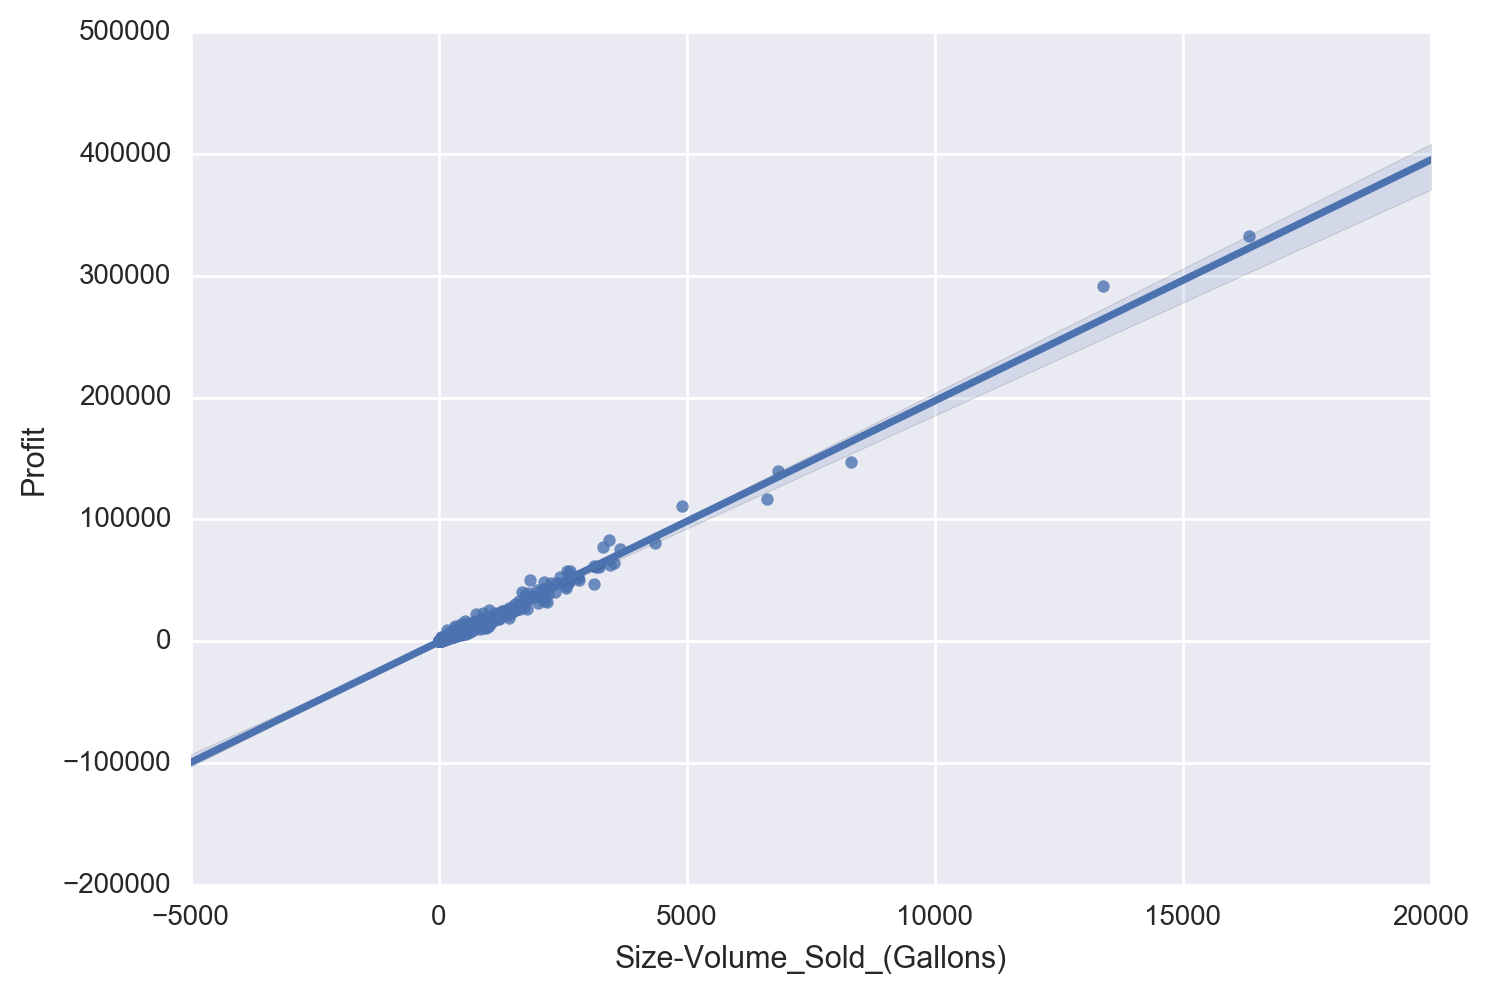

In [74]:
import seaborn as sns

x = pd.Series(iowa_2015_sales['Volume_Sold_(Gallons)'], name="Size-Volume_Sold_(Gallons)") 
y = pd.Series(iowa_2015_sales['Profit'], name="Profit")

ax = sns.regplot(x=x, y=y)

In [75]:
# The profit to store size ratio increasing as store size increases

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [77]:
# Function to create a broader  liquor type categories.
def assign_category(x):
    x = x.lower()
    if 'brand' in x:
        return 'Brandy'
    elif 'whisk' in x:
        return 'Whisky'
    elif 'cocktail' in x:
        return 'Cocktails'
    elif 'vodka' in x:
        return 'Vodka'
    elif 'gin' in x:
        return 'Gin'
    elif "tequila" in x:
        return 'Tequila'
    elif 'rum' in x:
        return 'Rum'
    elif 'schnapps' in x:
        return 'Schnapps'
    elif 'lique' in x:
        return 'Liqueurs'
    elif 'alcohol' in x:
        return 'Alcohol'
    elif 'scotch' in x:
        return 'Scotch'
    elif 'sec' in x:
        return 'Sec'
    elif 'special' in x:
        return 'Speciality'
    elif 'creme' in x:
        return 'Creme'
    elif 'amaretto' in x:
        return 'Amaretto'
    else:
        return 'Other'
iowa['liquor_category'] = iowa['Category_Name'].map(assign_category)
print iowa['liquor_category'].unique()
print iowa['liquor_category'].value_counts()

['Brandy' 'Whisky' 'Cocktails' 'Vodka' 'Gin' 'Schnapps' 'Speciality'
 'Tequila' 'Liqueurs' 'Scotch' 'Rum' 'Sec' 'Amaretto' 'Alcohol' 'Other'
 'Creme']
Whisky        81565
Vodka         69690
Rum           22598
Gin           19902
Liqueurs      17832
Brandy        14978
Schnapps      14494
Tequila       12044
Cocktails      6883
Speciality     2527
Scotch         2285
Amaretto       1618
Sec            1231
Creme           726
Alcohol         572
Other           313
Name: liquor_category, dtype: int64


### 5.7 Do relationships exist between the broader liquor type and profit?

In [79]:
# TO DO

#It looks like Whisky has more sales and may have more profit.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [ ]:
# TO DO

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [ ]:
# A Tax could be based on Liquor Type Profit or Liquor Brand Sales

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [ ]:
# TO DO

### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [ ]:
# TO DO

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [ ]:
# TO DO

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [ ]:
# TO DO

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


In [ ]:
# TO DO

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

In [ ]:
# TO DO

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?

In [ ]:
# TO DO